**Лабораторная работа 2**

1. К текущему датасету необходимо добавить новый аттрибут.

In [2]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

df = pandas.read_csv('Earthquakes.csv')
df.head()

,Unnamed: 0,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
0,0,2023-02-06 01:17:32,37.043,37.288,8.60,1.92,MW,7.7,Pazarcık (Kahramanmaraş),543428
1,1,2023-02-06 10:24:47,37.239,38.089,7.00,0.58,MW,7.6,Elbistan (Kahramanmaraş),543593
2,2,2023-02-06 01:28:16,36.920,37.304,6.20,0.21,MW,6.6,Nurdağı (Gaziantep),543431
3,3,2023-02-20 17:04:27,36.021,36.037,21.73,0.94,MW,6.4,Yayladağı (Hatay),551067
4,4,2023-02-06 12:02:11,36.478,38.071,17.04,0.93,MW,5.9,Göksun (Kahramanmaraş),543617


Добавим столбец, где будет выражена магнитуда по шкале Канамори (в исходных данных используется шкала Рихтера)

In [3]:
import pandas

df = pandas.read_csv('Earthquakes.csv')
df['Kanamori-scale'] = df.apply(lambda row: 10**((3/2)*(row['Magnitude'] + 10.7)), axis=1)
df.head()

,Unnamed: 0,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID,Kanamori-scale
0,0,2023-02-06 01:17:32,37.043,37.288,8.60,1.92,MW,7.7,Pazarcık (Kahramanmaraş),543428,3.981072e+27
1,1,2023-02-06 10:24:47,37.239,38.089,7.00,0.58,MW,7.6,Elbistan (Kahramanmaraş),543593,2.818383e+27
2,2,2023-02-06 01:28:16,36.920,37.304,6.20,0.21,MW,6.6,Nurdağı (Gaziantep),543431,8.912509e+25
3,3,2023-02-20 17:04:27,36.021,36.037,21.73,0.94,MW,6.4,Yayladağı (Hatay),551067,4.466836e+25
4,4,2023-02-06 12:02:11,36.478,38.071,17.04,0.93,MW,5.9,Göksun (Kahramanmaraş),543617,7.943282e+24


2. Причесать датасет

**Поиск и удаление пропусков**

В первой лабораторной работые было выяснено, что пропущенных данных в датасете нет.

**Поиск дубликатов**

In [4]:
quantity_rows_before_deletion = df.shape[0]
df.drop_duplicates()
quantity_rows_after_deletion = df.shape[0]
if quantity_rows_before_deletion == quantity_rows_after_deletion:
    print("Дубликаты не найдены")
else:
    print(f"Количество удаленных дубликатов {quantity_rows_after_deletion - quantity_rows_before_deletion}")

Дубликаты не найдены


**Поиск и удаление выбросов**

In [5]:
#  Убираем нечисловые стобцы
numericAttrsList = ['Longitude','Latitude','Depth','Rms', 'Magnitude']
dfNumeric = df.filter(numericAttrsList, axis=1)
print(f"Размер df Numeric = {dfNumeric.shape}")

dfNumeric.head()

Размер df Numeric = (15901, 5)


,Longitude,Latitude,Depth,Rms,Magnitude
0,37.043,37.288,8.60,1.92,7.7
1,37.239,38.089,7.00,0.58,7.6
2,36.920,37.304,6.20,0.21,6.6
3,36.021,36.037,21.73,0.94,6.4
4,36.478,38.071,17.04,0.93,5.9


Text(0.5, 0, 'Attributes')

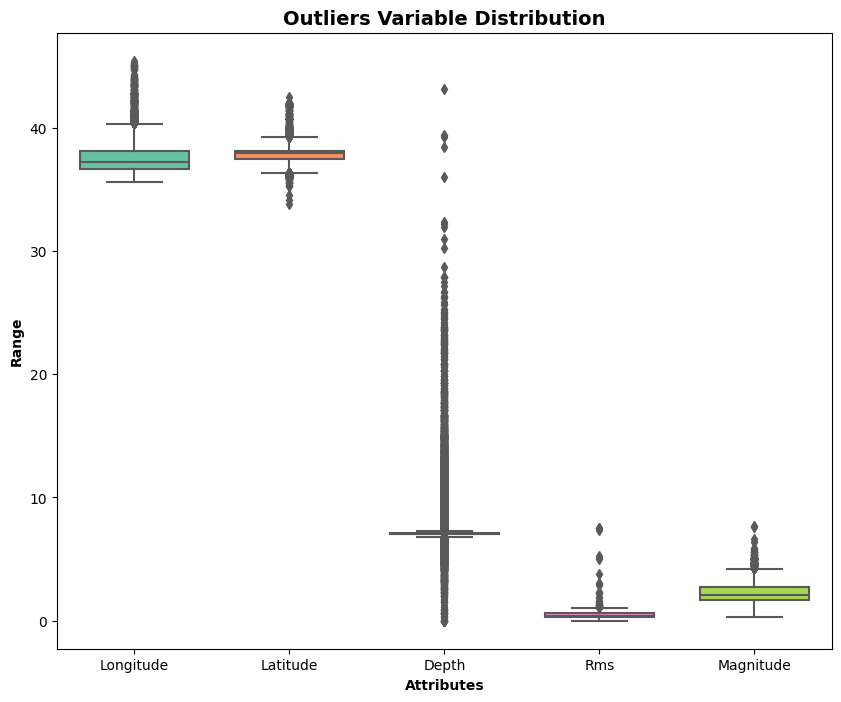

In [6]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = dfNumeric[numericAttrsList], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [7]:
# Удаление выбросов для [Depth]
Q1 = dfNumeric.Depth.quantile(0.05)
Q3 = dfNumeric.Depth.quantile(0.95)
IQR = Q3 - Q1
dfNumeric = dfNumeric[(dfNumeric.Depth >= Q1 - 1.5 * IQR) & (dfNumeric.Depth <= Q3 + 1.5 * IQR)]

# Удаление выбросов для [Rms]
Q1 = dfNumeric.Rms.quantile(0.05)
Q3 = dfNumeric.Rms.quantile(0.95)
IQR = Q3 - Q1
dfNumeric = dfNumeric[(dfNumeric.Rms >= Q1 - 1.5 * IQR) & (dfNumeric.Rms <= Q3 + 1.5 * IQR)]

# Удаление выбросов для [Magnitude]
Q1 = dfNumeric.Magnitude.quantile(0.05)
Q3 = dfNumeric.Magnitude.quantile(0.95)
IQR = Q3 - Q1
dfNumeric = dfNumeric[(dfNumeric.Magnitude >= Q1 - 1.5 * IQR) & (dfNumeric.Magnitude <= Q3 + 1.5 * IQR)]

print(f"Размер df_numeric после удаления выбросов= {dfNumeric.shape}")

Размер df_numeric после удаления выбросов= (15799, 5)


3. Построить графики зависимости одной переменной от другой

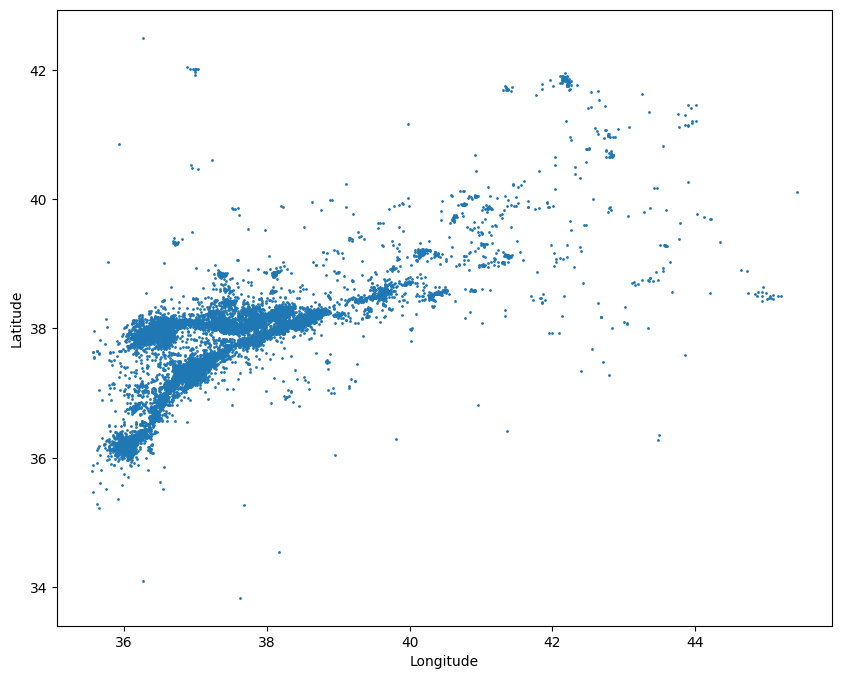

In [8]:
plt.scatter(df['Longitude'], df['Latitude'], s = 1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

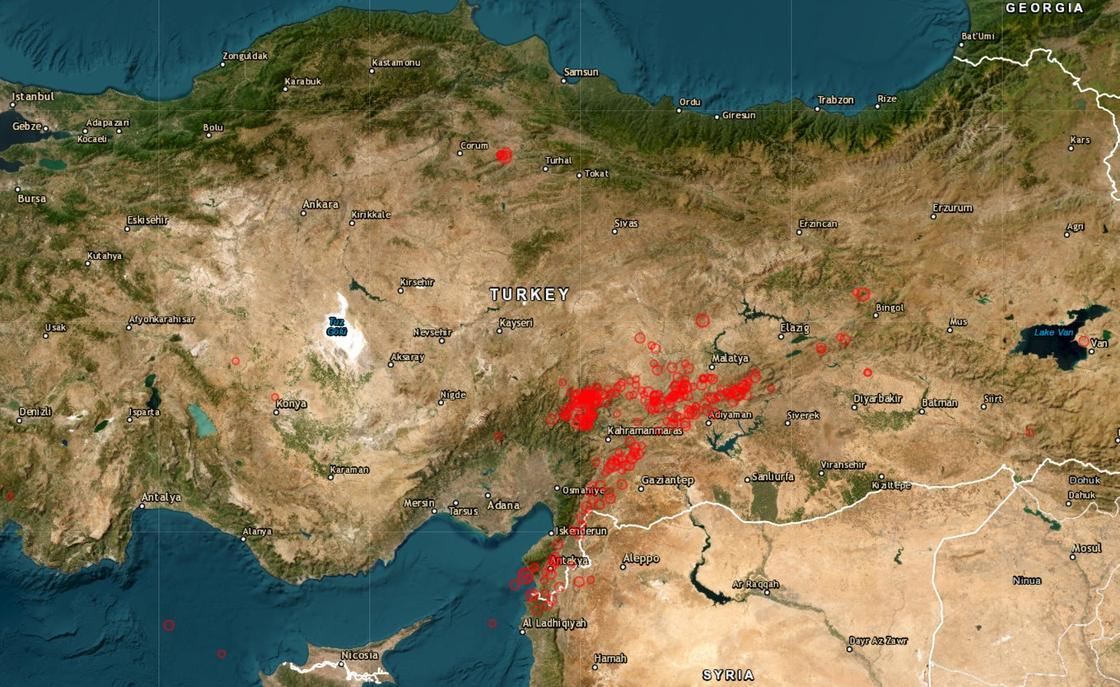

График зависимости широты и долготы показывает расположение подземных толчков. Для наглядности приложена картинка с расположением землетрясений на карте. Контуры, описанные землетрясениями совпаают со стыками литосферных плит.

Ниже представлен график зависимости глубины от магнитуды. Почти все землетрясения происходили на глубине от нескольких километров до 20 километров.

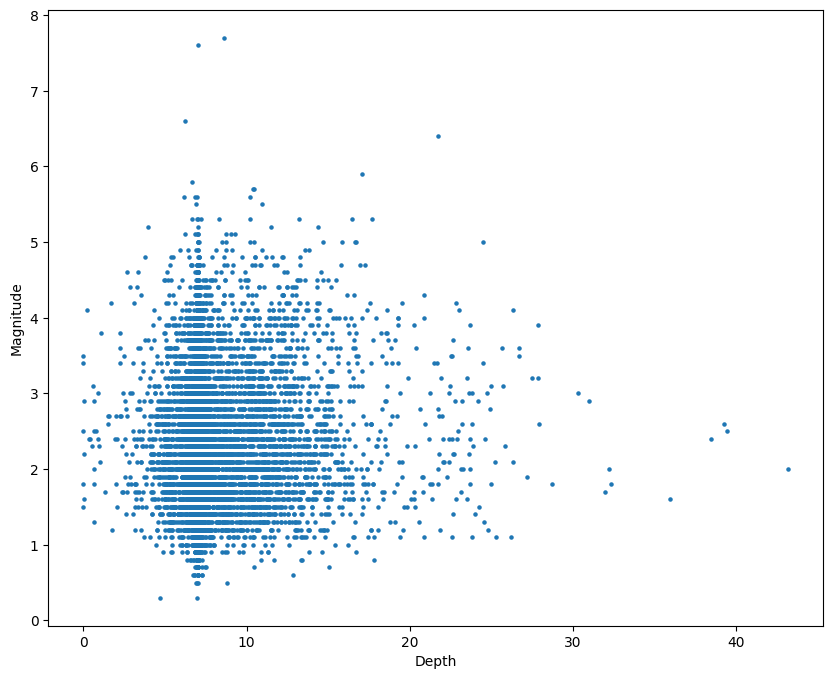

In [12]:
plt.scatter(df['Depth'], df['Magnitude'], s = 5)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()


На графике ниже показана зависимость Rms от магнитуды.
Rms (root-mean-square) - параметр определяет соответствие наблюдаемого времени прибытия прогнозируемому времени прибытия для данного местоположения. Меньшие цифры отражают лучшее соответствие данных. Значение зависит от точности скоростной модели, используемой для вычисления местоположения землетрясения, весовых коэффициентов качества, присвоенных данным о времени прибытия, и процедуры, используемой для определения местоположения землетрясения.

За очень редким исключением землетрясения с любой магнитудой соответствуют Rms в диапазоне 0-1

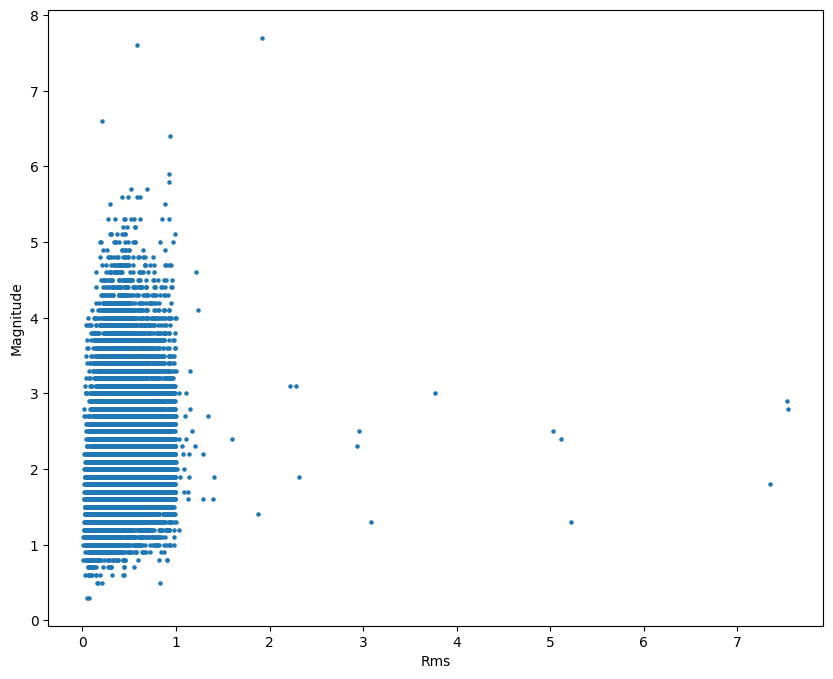

In [18]:
plt.scatter(df['Rms'], df['Magnitude'], s = 5)
plt.xlabel('Rms')
plt.ylabel('Magnitude')
plt.show()


4. Изучение метода kMeans

   **Нормализация данных**

In [19]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(dfNumeric)
df_numeric_scaled = pandas.DataFrame(minmax_processed, index=dfNumeric.index, columns=numericAttrsList)
df_numeric_scaled.head()

,Longitude,Latitude,Depth,Rms,Magnitude
1,0.170638,0.491111,0.326188,0.304813,1.000000
2,0.138295,0.400485,0.288910,0.106952,0.863014
4,0.093481,0.489033,0.794035,0.491979,0.767123
5,0.042786,0.271415,0.309413,0.486631,0.753425
6,0.263105,0.516047,0.484623,0.363636,0.739726


**Применение kMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

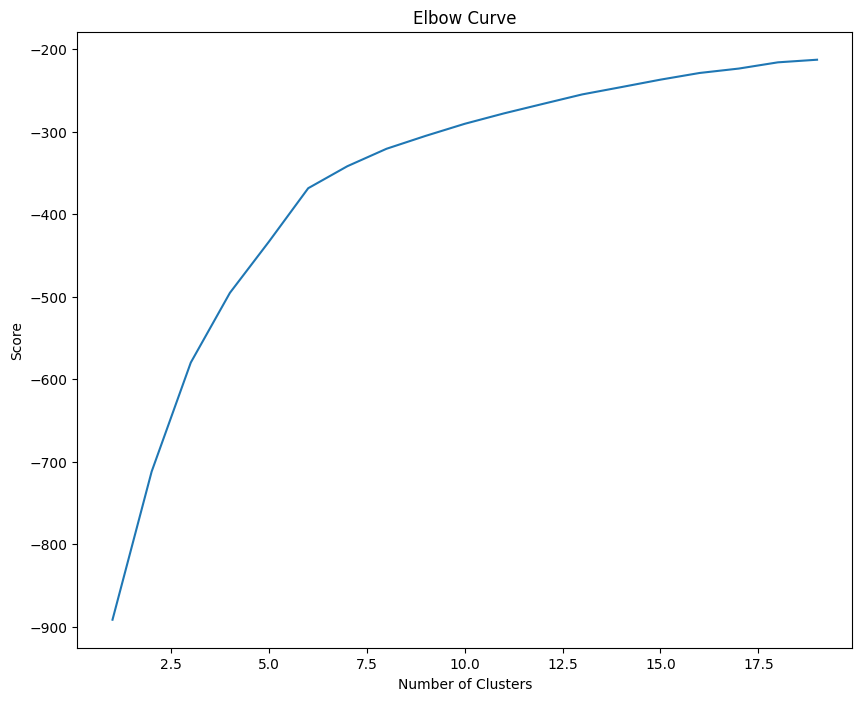

In [21]:
# Построим Elbow Curve, чтобы выбрать количество кластеров по месту перелома графика
from sklearn.cluster import KMeans

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
# Выбрали количество кластеров = 6
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(df_numeric_scaled)
dfNumeric['cluster'] = kmeans.labels_
dfNumeric.head()

,Longitude,Latitude,Depth,Rms,Magnitude,cluster
1,37.239,38.089,7.00,0.58,7.6,3
2,36.920,37.304,6.20,0.21,6.6,3
4,36.478,38.071,17.04,0.93,5.9,2
5,35.978,36.186,6.64,0.92,5.8,3
6,38.151,38.305,10.40,0.69,5.7,3


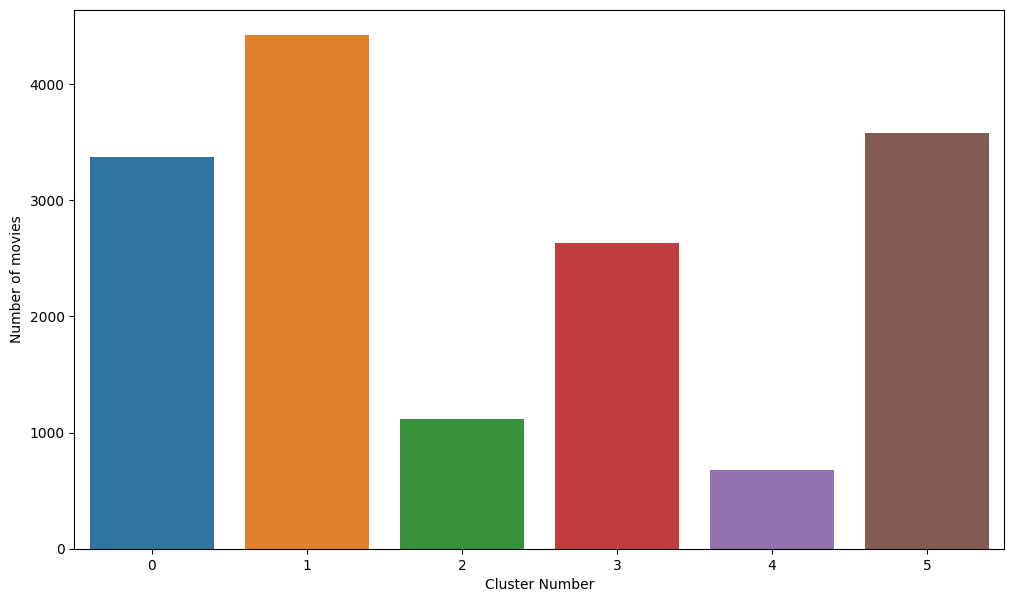

In [25]:
# График распределения землетрясений по кластерам
import numpy as np

plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,6,1),y=dfNumeric.groupby(['cluster']).count()['Magnitude'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of earthquakes")

In [26]:
# Среднее значение по каждому кластеру
dfNumeric.groupby(['cluster']).mean()

,Longitude,Latitude,Depth,Rms,Magnitude
cluster,,,,,
0,38.309075,38.190183,7.109086,0.319594,1.870632
1,36.701238,37.288658,7.151444,0.292938,1.913015
2,37.452355,37.749999,13.431527,0.427027,2.553482
3,37.191571,37.771628,7.201248,0.441932,3.421986
4,41.399821,39.521587,7.467357,0.469927,1.945228
5,37.104337,37.815790,7.054760,0.731000,2.185363
